<a href="https://colab.research.google.com/github/SonAlexLe/Data-Project/blob/master/Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, pairwise_distances, davies_bouldin_score
from sklearn.linear_model import LogisticRegression
import collections

In [0]:
df_train_x = pd.read_csv(r"/gdrive/My Drive/Colab Notebooks/football_train_x.csv",delimiter = ',')
df_train_y = pd.read_csv(r"/gdrive/My Drive/Colab Notebooks/football_train_y.csv",delimiter = ',')
df_test_x = pd.read_csv(r"/gdrive/My Drive/Colab Notebooks/football_test_x.csv",delimiter = ',')
df_test_y = pd.read_csv(r"/gdrive/My Drive/Colab Notebooks/football_test_y.csv",delimiter = ',')

In [0]:
df_train_x.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,19,8,2,1,1,18,6,7,2,8,10,5,4
1,24,16,2,0,1,12,8,6,3,12,13,5,1
2,3,12,0,0,0,13,8,4,4,8,8,0,11
3,2,20,0,0,0,7,6,2,2,10,10,2,6
4,24,9,0,1,-1,14,11,6,3,13,16,4,5


In [0]:
df_train_full = pd.concat([df_train_x,df_train_y],axis=1,join='outer')
df_train = df_train_x.drop(['HomeTeam', 'AwayTeam'],axis=1)
df_train.head()

,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,2,1,1,18,6,7,2,8,10,5,4
1,2,0,1,12,8,6,3,12,13,5,1
2,0,0,0,13,8,4,4,8,8,0,11
3,0,0,0,7,6,2,2,10,10,2,6
4,0,1,-1,14,11,6,3,13,16,4,5


In [0]:
df_test = df_test_x

In [0]:
# corr_mat=df_train_x.corr()
corr_mat = df_train.corr()
# corr_mat.sort_values(by=['FTG'],ascending=False)

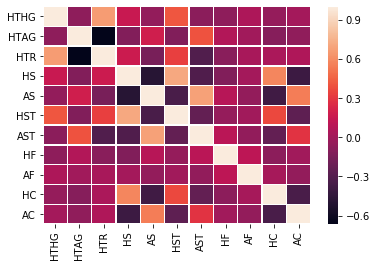

In [0]:
ax = sns.heatmap(corr_mat,linewidth=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) # fix heatmap broken by matplotlib, IMPORTANT
plt.show()

In [0]:
scaler = preprocessing.StandardScaler()
# scaler.fit(df_train_x)
scaler.fit(df_train)
# scaled_df = scaler.transform(df_train_x)
scaled_df = scaler.transform(df_train)
# scaled_df = preprocessing.scale(df_train_x)

In [0]:
pca = PCA()
pca.fit(scaled_df)
pca_data=pca.transform(scaled_df)

In [0]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

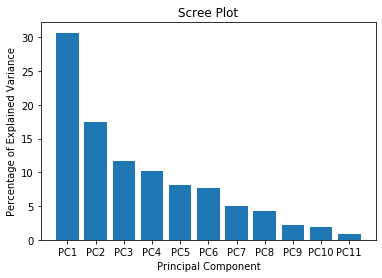

In [0]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 

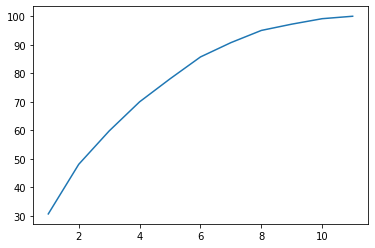

In [0]:
retained_variance = pca.explained_variance_ratio_.cumsum()*100
plt.plot(range(1,len(retained_variance)+1),retained_variance)

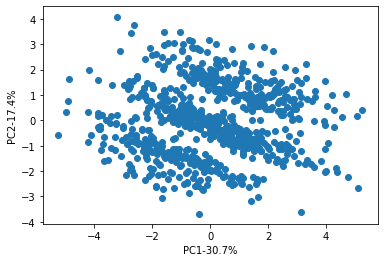

In [0]:
pca_df=pd.DataFrame(pca_data,columns=labels)

plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))



    
plt.show()
    

When k = 7, Davies-Bouldin score is the lowest, which is 0.761157308783119.
Davies-Bouldin scores of first 10 ks:
[1.0749889390998053, 0.9722988826721068, 0.8946861742908799, 0.951312690593485, 0.8470308317635351, 0.8127396558508104, 0.761157308783119, 0.7792202379095208, 0.7648415065977455, 0.7769751414624652]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1, 'K Means Clustering with k = 7')

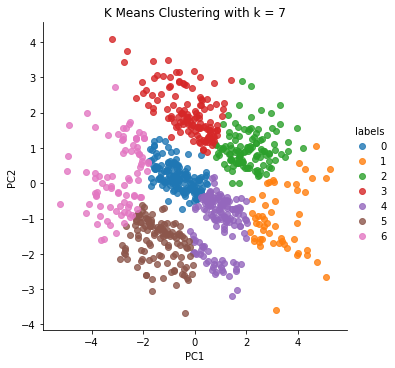

In [335]:
scores = []
for i in range(2, 50):
  kmeans = KMeans(n_clusters=i)
  clustered_data = pd.DataFrame(kmeans.fit_predict(pca_df[['PC1','PC2']]))
  transformed_df = pca_df[['PC1','PC2']]
  # score = silhouette_score(transformed_df, np.ravel(clustered_data))
  # score = silhouette_score(pairwise_distances(transformed_df), np.ravel(clustered_data))
  score = davies_bouldin_score(transformed_df, np.ravel(clustered_data))
  scores.append(score)
# bestk = np.argmax(scores) + 1
bestk = np.argmin(scores) + 1
# print(f'When k = {bestk}, the Silhouette score is the highest, which is {scores[bestk-1]}.')
print(f'When k = {bestk}, Davies-Bouldin score is the lowest, which is {scores[bestk-1]}.')
print('Davies-Bouldin scores of first 10 ks:')
print(scores[0:10])
kmeans = KMeans(n_clusters=bestk)
clustered_data = pd.DataFrame(kmeans.fit_predict(pca_df[['PC1','PC2']]))
transformed_df = pca_df[['PC1','PC2']]
transformed_df['labels'] = clustered_data
sns.lmplot('PC1', 'PC2' ,data=transformed_df.loc[:,('PC1','PC2','labels')],fit_reg=False,hue='labels')
ax = plt.gca()
ax.set_title(f"K Means Clustering with k = {bestk}")

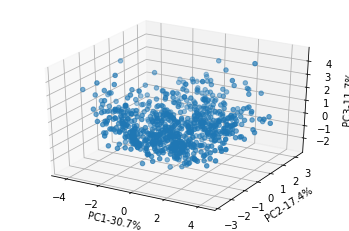

explained variance of PC3: 11.7


In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.PC1,pca_df.PC2,pca_df.PC3)
ax.set_xlabel('PC1-{0}%'.format(per_var[0]))
ax.set_ylabel('PC2-{0}%'.format(per_var[1]))
ax.set_zlabel(f'PC3-{per_var[2]}%')
bottom, top = ax.get_ylim()
left, right = ax.get_xlim()
ax.set_ylim(bottom + 1, top - 1)
ax.set_xlim(left + 1, right - 1)
plt.show()
plt.show()
print(f'explained variance of PC3: {per_var[2]}')

In [0]:
loading_scores = pd.Series(pca.components_[0], index=df_train.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 variables
top_10_vars = sorted_loading_scores[0:10].index.values
 
## print the variable names and their scores (and +/- sign)
print(loading_scores[top_10_vars])

HS      0.425921
AS     -0.411482
HST     0.389717
AST    -0.365719
HC      0.322086
AC     -0.286752
HTR     0.280118
HTAG   -0.227177
HTHG    0.196135
HF     -0.089242
dtype: float64


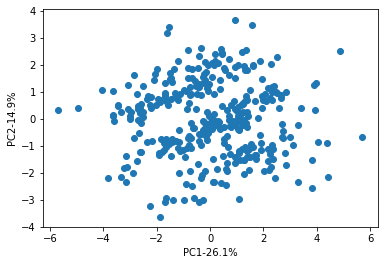

In [0]:
scaler_test = preprocessing.StandardScaler()
scaler_test.fit(df_test)
scaled_test = scaler_test.transform(df_test)
pca_test = PCA()
pca_test.fit(scaled_test)
pca_data_test = pca_test.transform(scaled_test)
per_var_test = np.round(pca_test.explained_variance_ratio_* 100, decimals=1)
labels_test = ['PC' + str(x) for x in range(1, len(per_var_test)+1)]
pca_df_test = pd.DataFrame(pca_data_test,columns=labels_test)
transformed_test = pca_df_test[['PC1','PC2']]
plt.scatter(pca_df_test.PC1,pca_df_test.PC2)
plt.xlabel('PC1-{0}%'.format(per_var_test[0]))
plt.ylabel('PC2-{0}%'.format(per_var_test[1]))
plt.show()

In [346]:
# knn
accuracies = []
# error = []
true = df_test_y['Interest']
for n in range(1,50):
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(pca_df[['PC1','PC2']],df_train_y['Interest'])
  pred = neigh.predict(pca_df_test[['PC1','PC2']])
  correct = 0
  for i in range(true.shape[0]):
    if pred[i] == true[i]:
      correct += 1
  accuracy = np.round(correct/true.shape[0],4)   
  accuracies.append(accuracy)
bestk = np.argmax(accuracies) + 1
#  error.append(np.mean(pred != True))
# bestk = np.argmin(error) + 1
print(f'When k = {bestk}, the accuracy is the highest, which is {np.round(accuracies[bestk-1]*100,2)}%.')
# print(f'When k = {bestk}, the mean error reaches the minimum, which is {error[bestk-1]}')
print('First 10 ks:')
# print(error[0:10])
print(accuracies[0:10])
# train model with best k
neigh = KNeighborsClassifier(n_neighbors=bestk)
neigh.fit(pca_df[['PC1','PC2']],df_train_y['Interest'])
pred = neigh.predict(pca_df_test[['PC1','PC2']])
true = df_test_y['Interest']
cm = confusion_matrix(true,pred)

When k = 11, the accuracy is the highest, which is 52.92%.
First 10 ks:
[0.5117, 0.5205, 0.4854, 0.4942, 0.4912, 0.5146, 0.5117, 0.5088, 0.5117, 0.5263]


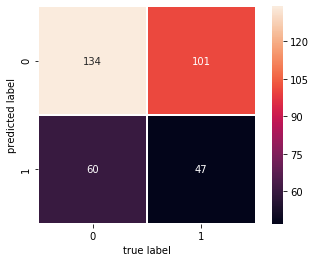

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       194
           1       0.44      0.32      0.37       148

    accuracy                           0.53       342
   macro avg       0.50      0.50      0.50       342
weighted avg       0.51      0.53      0.51       342



In [347]:
classes=[0,1]
ax2 = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True,linewidths=0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
print(classification_report(true,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


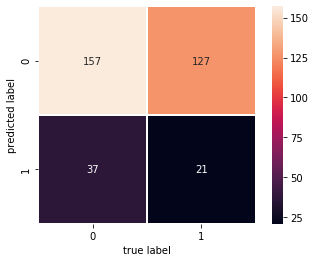

              precision    recall  f1-score   support

           0       0.55      0.81      0.66       194
           1       0.36      0.14      0.20       148

    accuracy                           0.52       342
   macro avg       0.46      0.48      0.43       342
weighted avg       0.47      0.52      0.46       342



In [344]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(pca_df[['PC1','PC2']],df_train_y['Interest'])
pred2 = log_reg.predict(pca_df_test[['PC1','PC2']])
cm2=confusion_matrix(true,pred2)
ax3 = sns.heatmap(cm2.T, square=True, annot=True, fmt='d', cbar=True,linewidths=0.5)
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = ax3.get_ylim()
ax3.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
print(classification_report(true,pred2))

In [0]:
# reminder: optimize k for knn, see fineli-knn1